`IMPORT LIBRARIES`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

`REDA THE DATA`

In [2]:
data = pd.read_csv('height-weight.csv')

In [3]:
data.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Here Weight is independent feature and height is dependent feature.

`VISUALIZATION OF THE DATA IN SCATTER PLOT`

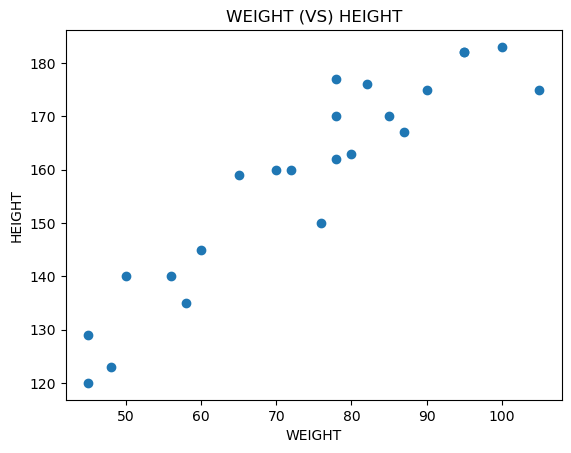

In [7]:
plt.scatter(data['Weight'],data['Height'])
plt.xlabel('WEIGHT')
plt.ylabel('HEIGHT')
plt.title('WEIGHT (VS) HEIGHT')
plt.show()

`DIVIDE DATASET INTO INDEPENDENT AND DEPENDENT FEATURES`

In [8]:
X = data.iloc[:,:-1]
y= data.iloc[:,-1]
print(X)
print(y)

    Weight
0       45
1       58
2       48
3       60
4       70
5       78
6       80
7       90
8       95
9       78
10      82
11      95
12     105
13     100
14      85
15      78
16      50
17      65
18      76
19      87
20      45
21      56
22      72
0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64


`SPLIT DATA INTO TRAIN AND TEST SET`

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_test,y_train,y_test

(    Weight
 12     105
 1       58
 13     100
 5       78
 2       48
 11      95
 20      45
 3       60
 4       70
 18      76
 16      50
 21      56
 22      72
 7       90
 10      82
 14      85
 19      87
 6       80,
     Weight
 15      78
 9       78
 0       45
 8       95
 17      65,
 12    175
 1     135
 13    183
 5     162
 2     123
 11    182
 20    129
 3     145
 4     160
 18    150
 16    140
 21    140
 22    160
 7     175
 10    176
 14    170
 19    167
 6     163
 Name: Height, dtype: int64,
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

X_train , y_train are used for training the model.

X_test , y_test are used for testing the model.

`STANDARDIZE THE TRAINING DATA`

Standardization is always done after the splitting of data.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [12]:
data

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


`TRAINING THE SIMPLE LINEAR REGRESSION `

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression()

In [16]:
slope = regressor.coef_
intercept = regressor.intercept_
print(f'Slope : {slope}')
print(f'Intercept :{intercept}')

Slope : [0.9630459]
Intercept :85.96709053063559


`VISUALIZATION OF THE TRAIN DATA AND BEST FIT LINE`

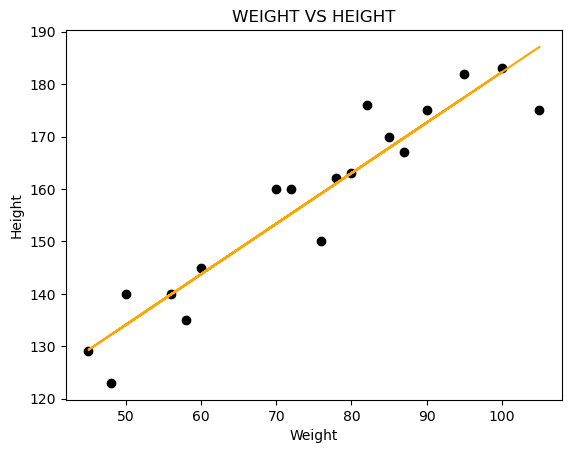

In [23]:
plt.scatter(X_train,y_train,color='black')
plt.plot(X_train,regressor.predict(X_train),color='orange')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('WEIGHT VS HEIGHT')
plt.show()

<strong>RESIDUAL<strong>

In [26]:
y_pred = regressor.predict(X_test)
residuals = y_test - y_pred
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

<strong>PERFORMANCE METRICS<strong>

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test,y_pred)

print('mse :',mse)
print('mae :',mae)
print('rmse',rmse)
print('r_squared :',r_squared)

mse : 109.77592599051658
mae : 9.822657814519232
rmse 10.477400726827078
r_squared : 0.776986986042344


`Predict height for the weight 80`

In [41]:
regressor.predict(np.array([80]).reshape(1,-1))

C:\Users\gumma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([163.01076266])

# ASSUMPTIONS OF LINEAR REGRESSION

`LINEARITY` : Relationship between independent and dependent features should be <strong>LINEAR</strong>

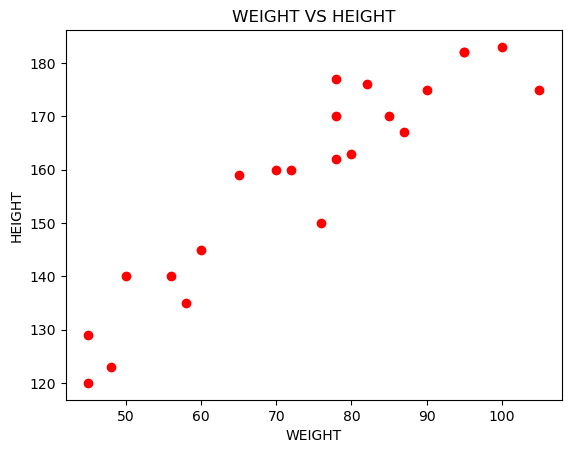

In [47]:
plt.scatter(X,y,color='red')
plt.xlabel('WEIGHT')
plt.ylabel('HEIGHT')
plt.title('WEIGHT VS HEIGHT')
plt.show()

In the above diagram we can clearly see that X and y are related linearly

`NO MULTICOLLINEARITY` : No two independent features are correlated with each other.

In [48]:
data.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


<AxesSubplot:>

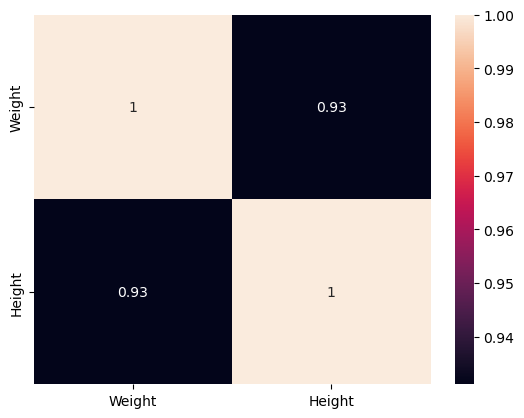

In [51]:
sns.heatmap(data.corr(),annot=True)

`NORMAL RESIDUAL`

C:\Users\gumma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

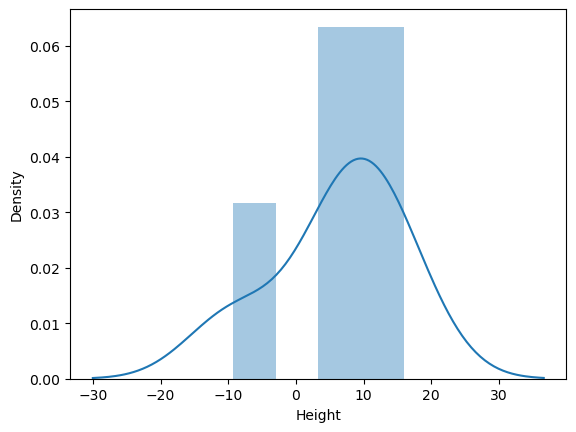

In [53]:
sns.distplot(residuals,kde=True)

`The above graph shows the residuals follow normal distribution`

`HOMOSCADASTICITY`

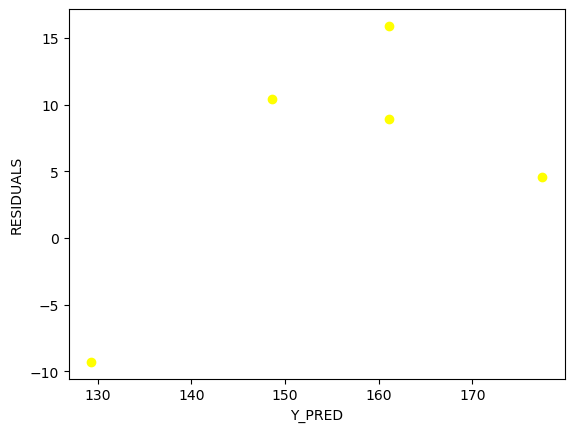

In [56]:
plt.scatter(y_pred,residuals,color='yellow')
plt.xlabel('Y_PRED')
plt.ylabel('RESIDUALS')
plt.show()